In [1]:
using LinearAlgebra # Needed for matrix operations like rank() and solving linear systems.
using Plots
default(legend=false, aspect_ratio=:equal) # Set convenient plot defaults.

# Finding Line-Segment Intersections

A **line segment** is defined by its two endpoints, $p_1$ and $p_2$. We can describe any point along this segment using a parametric equation: $p_1 + s(p_2-p_1)$, where the parameter $s$ must be in the range $[0,1]$. When $s=0$, we're at $p_1$; when $s=1$, we're at $p_2$.

To find out if two line segments, $p_1p_2$ and $q_1q_2$, intersect, we can set their parametric equations equal to each other. Our goal is to find parameters $s$ and $t$ such that:

$$ p_1 + s(p_2 - p_1) = q_1 + t(q_2 - q_1) $$

For an intersection to occur on *both segments*, we must find a solution where $s \in [0,1]$ and $t \in [0,1]$. We can rearrange the equation to group the unknown parameters $s$ and $t$:

$$ s(p_2 - p_1) - t(q_2 - q_1) = q_1 - p_1 $$

This is a standard $2 \times 2$ linear system of equations, which we can write in matrix form. Let the vectors be the columns of a matrix:

$$ 
\begin{pmatrix} p_2 - p_1 & q_1 - q_2 \end{pmatrix}
\begin{pmatrix} s \\ t \end{pmatrix} =
\begin{pmatrix} q_1 - p_1 \end{pmatrix}
$$

If the two line segments are parallel, the two column vectors in the matrix are linearly dependent, making the matrix **singular** (its determinant is zero). In this case, there is no unique solution. For simplicity, we'll assume parallel lines don't intersect, though a more robust implementation would check if they are also collinear and overlapping.

### Handling Floating-Point Precision with a Tolerance

When working with floating-point numbers, rounding errors can cause issues. An intersection that should be exactly at an endpoint (e.g., $s=1$) might be calculated as $s=1.000000001$. To handle this, we can introduce a small tolerance, $\delta$.

Instead of checking if $s \in [0, 1]$, we check if $s \in [-\delta, 1+\delta]$.
- A positive $\delta$ allows for intersections slightly outside the true segment endpoints.
- A negative $\delta$ would require the intersection to be strictly inside the segment, away from the endpoints.
- For our purposes, we'll typically use $\delta=0$ or a very small positive number.

In [2]:
"""
    linesegment_intersect(p1, p2, q1, q2, δ)

Checks if the line segment p1-p2 intersects the line segment q1-q2.

# Arguments
- `p1`, `p2`: 2-element vectors for the endpoints of the first segment.
- `q1`, `q2`: 2-element vectors for the endpoints of the second segment.
- `δ`: A tolerance for the intersection check.

# Returns
- `(true, pintersect)`: if they intersect, where `pintersect` is the coordinate vector of the intersection.
- `(false, nothing)`: if they do not intersect.
"""
function linesegment_intersect(p1, p2, q1, q2, δ)
    # Set up the 2x2 linear system Ax = b
    A = [p2-p1 q1-q2]  # The coefficient matrix
    b = q1-p1          # The right-hand side vector
    
    # If rank is 2, the lines are not parallel and have a unique intersection.
    if rank(A) == 2
        # Solve the system for [s, t] using Julia's efficient backslash operator.
        st = A \ b
        
        # Check if the intersection lies within both segments (using tolerance δ).
        # The parameters s and t must be between 0 and 1.
        if all(-δ .≤ st .≤ 1 + δ)
            # If it does, calculate the intersection point's coordinates using s.
            pintersect = p1 + st[1] * (p2 - p1)
            return true, pintersect
        else
            # The lines intersect, but outside the bounds of the segments.
            return false, nothing
        end
    else
        # The lines are parallel (rank < 2) and do not have a unique intersection.
        # A more advanced check for collinear overlap could be added here.
        return false, nothing
    end
end

linesegment_intersect

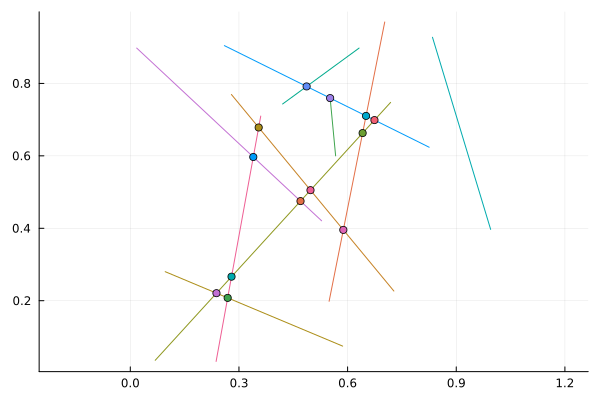

In [3]:
# Example: Generate n random line segments, then find and plot all intersections.
n = 10

# Use a list comprehension to create a vector of 2x2 matrices.
# Each matrix represents one line segment, with its columns being the endpoints.
lines = [rand(2, 2) for i = 1:n]

# Plot all the generated line segments.
plot() # Initialize an empty plot
for i in 1:n
    # For each line, plot from its x-coordinates (row 1) and y-coordinates (row 2).
    plot!(lines[i][1,:], lines[i][2,:])
end

# Find all intersections using a nested loop.
# We start j from i+1 to avoid checking the same pair of lines twice (i,j) vs (j,i).
for i in 1:n
    for j in i+1:n
        # Extract the endpoints for line i and line j.
        p1, p2 = lines[i][:,1], lines[i][:,2]
        q1, q2 = lines[j][:,1], lines[j][:,2]
        
        isect, pq = linesegment_intersect(p1, p2, q1, q2, 0)
        
        if isect
            # If an intersection exists, add it to the plot as a dot.
            # scatter! expects coordinates in vectors, e.g., [x-coord], [y-coord].
            scatter!([pq[1]], [pq[2]])
        end
    end
end

plot!() # Display the final plot with all lines and intersection points.